# IF687 - Introdução a Multimídia
## Atividade de Análise de Dados
### Hugo de Almeida Medeiros - ham4@cin.ufpe.br

### Preparação do Ambiente

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

### Carregamento dos dados

In [ ]:
path = kagglehub.dataset_download("yasserh/titanic-dataset")
path = f"{path}/Titanic-Dataset.csv"
df = pd.read_csv(path)

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Análise Exploratória Rápida

A análise exploratória inicial permite identificar padrões gerais nos dados, possíveis outliers e tendências relevantes para o entendimento do conjunto de dados.

#### Colunas e tipos de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


#### Resumo Estatístico

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Valores Nulos Por Coluna

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### Visualizações com Matplotlib

#### Gráfico de Linha

O gráfico de linhas ilustra claramente que a probabilidade de sobrevivência no desastre do Titanic foi significativamente maior para as crianças, diminuindo gradualmente com o aumento da idade, destacando a influência da idade como um fator crucial na determinação do destino dos passageiros.

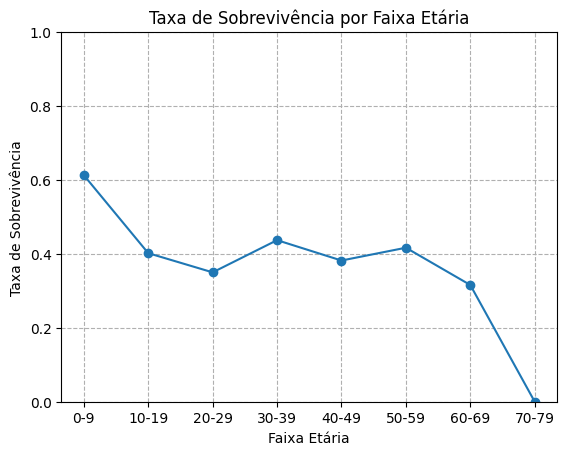

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False) #ok

survival_by_age = df.groupby('AgeGroup', observed = True)['survived'].mean().sort_index() #ok

plt.plot(survival_by_age.index, survival_by_age.values, marker='o') #ok

plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.grid(True, linestyle='--')
plt.ylim(0, 1)

plt.show()

#### Gráfico de Barras

O gráfico de barras demonstra a distribuição do sexo entre os passageiros do Titanic, demonstrando claramente que havia um número significativamente maior de passageiros do sexo masculino em comparação com o sexo feminino a bordo do navio.

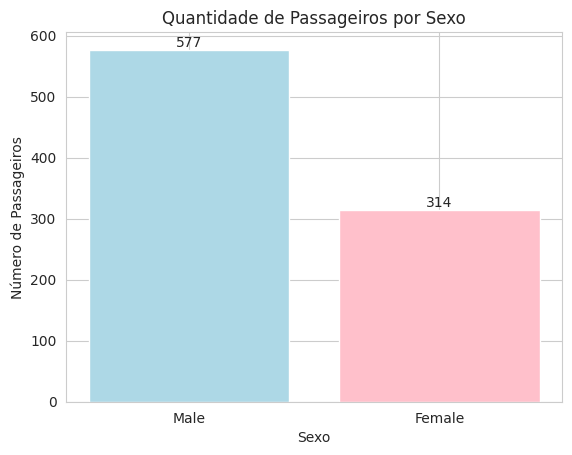

In [ ]:
sex_counts = df['sex'].value_counts()
fig, ax = plt.subplots()
bars = plt.bar(sex_counts.index.str.capitalize(), sex_counts.values, color=['lightblue', 'pink'])
ax.bar_label(bars)

plt.title('Quantidade de Passageiros por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Passageiros')

plt.show()

#### Gráfico de Pizza

O gráfico de pizza ilustra a proporção de passageiros em cada classe no Titanic, indicando visualmente a distribuição dos passageiros entre a 1ª, 2ª e 3ª classes, e permitindo comparar o tamanho relativo de cada grupo.

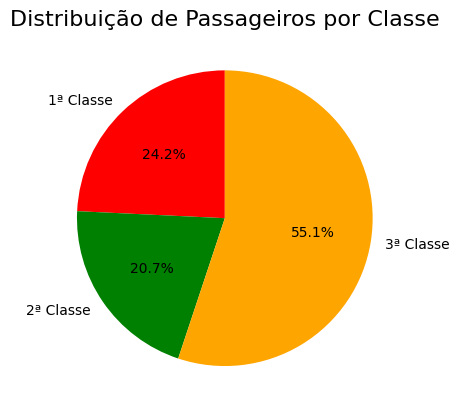

In [ ]:
class_counts = df['pclass'].value_counts().sort_index()

fig, ax = plt.subplots()
ax.pie(class_counts,
       labels=['1ª Classe', '2ª Classe', '3ª Classe'],
       colors=['red', 'green', 'orange'],
       autopct='%1.1f%%',
       startangle=90)

ax.set_title('Distribuição de Passageiros por Classe', fontsize=16)
plt.show()

#### Grafico de Dispersão

 O gráfico de dispersão mostra que a maioria dos passageiros pagou tarifas mais baixas, e não há uma relação linear clara entre a idade e a tarifa paga, embora existam alguns pontos que fogem desse padrão geral, como os dois pontos na tarifa acima de 500£.

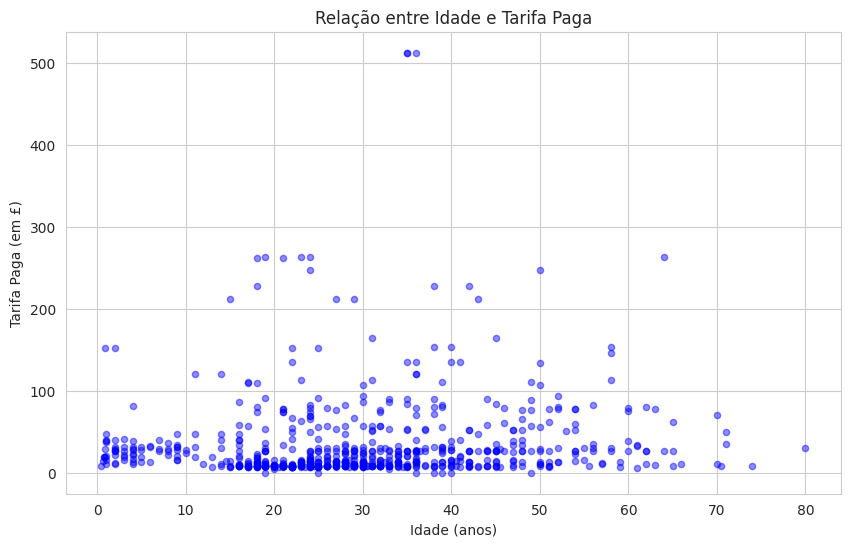

In [ ]:
df_completo = df.dropna(subset=['age', 'fare'])

plt.figure(figsize=(10, 6))
plt.scatter(x=df_completo['age'], y=df_completo['fare'],color='blue', s=20, alpha=0.45)

plt.title('Relação entre Idade e Tarifa Paga')
plt.xlabel('Idade (anos)')
plt.ylabel('Tarifa Paga (em £)')
plt.grid(True)

plt.show()

### Desafio Final

Ao analisar as taxas de sobrevivência no Titanic, observamos que a chance de sobreviver variou significativamente de acordo com a classe (passageiros de classes mais altas tiveram maior probabilidade de sobrevivência), a idade (crianças e jovens tiveram taxas mais elevadas) e, especialmente, o sexo (mulheres apresentaram uma taxa de sobrevivência notavelmente superior à dos homens), evidenciando a influência desses fatores no destino dos passageiros.

#### Taxa de sobrevivência por classe;

In [ ]:
print("Taxa de Sobrevivência por Classe:")
taxa_por_classe = df.groupby('pclass')['survived'].mean()
for classe, taxa in taxa_por_classe.items():
  print(f"Classe {classe}: {taxa*100:.2f}%")

Taxa de Sobrevivência por Classe:
Classe 1: 62.96%
Classe 2: 47.28%
Classe 3: 24.24%


#### Taxa de sobrevivência por idade:

In [ ]:
print("Taxa de Sobrevivência por Faixa Etária:")
taxa_por_idade = df.groupby('AgeGroup')['survived'].mean()

for grupo, taxa in taxa_por_idade.items():
  print(f"  Faixa {grupo}: {taxa*100:.2f}%")

Taxa de Sobrevivência por Faixa Etária:
  Faixa 0-9: 61.29%
  Faixa 10-19: 40.20%
  Faixa 20-29: 35.00%
  Faixa 30-39: 43.71%
  Faixa 40-49: 38.20%
  Faixa 50-59: 41.67%
  Faixa 60-69: 31.58%
  Faixa 70-79: 0.00%


/tmp/ipython-input-173-2678789606.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_por_idade = df.groupby('AgeGroup')['survived'].mean()


#### Taxa de sobrevivência por sexo:

In [ ]:
print("Taxa de Sobrevivência por Sexo:")

taxa_por_sexo = df.groupby('sex')['survived'].mean()

for sexo, taxa in taxa_por_sexo.items():
  print(f"  {sexo.capitalize()}: {taxa*100:.2f}%")

Taxa de Sobrevivência por Sexo:
  Female: 74.20%
  Male: 18.89%
